In [1]:
import numpy as np
import cupy as cp
from scipy.linalg import inv, expm
import networkx as nx
import time
import cupyx.scipy.linalg as cpx_scipy
from cupyx.profiler import benchmark
from matplotlib import pyplot as plt

from qwak_cupy.State import State as CState
from qwak.State import State as State

# State

In [2]:
n = 4
initNodes = [0,1,2,3]

initState = CState(n=n,nodeList=initNodes)
initState.buildState()
# print(initState.getStateVec())

In [3]:
n = 4
initNodes = [0,1,2,3]

initState = State(n=n,nodeList=initNodes)
initState.buildState()
# print(initState.getStateVec())

# Operator

In [4]:
from qwak_cupy.Operator import Operator as COperator
from qwak.Operator import Operator as Operator

In [5]:
n = 4
graph = nx.cycle_graph(n)

operator = COperator(graph)
operator.buildDiagonalOperator(0.5)
# print(operator.getOperator().round(3))

In [6]:
n = 4
graph = nx.cycle_graph(n)

operator = Operator(graph)
operator.buildDiagonalOperator(0.5)
# print(operator.getOperator().round(3))

# QuantumWalk

In [7]:
from qwak_cupy.QuantumWalk import QuantumWalk as CQuantumWalk
from qwak.QuantumWalk import QuantumWalk as QuantumWalk

In [8]:
n = 4
initNodes = [0,1,2,3]

initState = CState(n=n,nodeList=initNodes)
initState.buildState()

graph = nx.cycle_graph(n)

operator = COperator(graph)
operator.buildDiagonalOperator(0.5)

quantumWalk = CQuantumWalk(initState,operator)
quantumWalk.buildWalk()
finalState = quantumWalk.getFinalState()
# print(finalState.getStateVec().round(3))

In [9]:
n = 4
initNodes = [0,1,2,3]

initState = State(n,initNodes)
initState.buildState()

graph = nx.cycle_graph(n)

operator = Operator(graph)
operator.buildDiagonalOperator(0.5)

quantumWalk = QuantumWalk(initState,operator)
quantumWalk.buildWalk()
finalState = quantumWalk.getFinalState()
# print(finalState.getStateVec().round(3))

# ProbabilityDistribution

In [10]:
from qwak_cupy.ProbabilityDistribution import ProbabilityDistribution as CProbabilityDistribution
from qwak.ProbabilityDistribution import ProbabilityDistribution as ProbabilityDistribution

In [11]:
n = 4
initNodes = [0,1,2,3]

initState = CState(n=n,nodeList=initNodes)
initState.buildState()

graph = nx.cycle_graph(n)

operator = COperator(graph)
operator.buildDiagonalOperator(0.5)

quantumWalk = CQuantumWalk(initState,operator)
quantumWalk.buildWalk()
finalState = quantumWalk.getFinalState()

probDist = CProbabilityDistribution(finalState)
print(type(probDist))
probDist.buildProbDist()
print(probDist.getProbVec())


<class 'qwak_cupy.ProbabilityDistribution.ProbabilityDistribution'>
[0.25 0.25 0.25 0.25]


In [12]:
n = 4
initNodes = [0,1,2,3]

initState = State(n,initNodes)
initState.buildState()

graph = nx.cycle_graph(n)

operator = Operator(graph)
operator.buildDiagonalOperator(0.5)

quantumWalk = QuantumWalk(initState,operator)
quantumWalk.buildWalk()
finalState = quantumWalk.getFinalState()

probDist = ProbabilityDistribution(finalState)
print(type(probDist))
probDist.buildProbDist()
print(probDist.getProbVec())

<class 'qwak.ProbabilityDistribution.ProbabilityDistribution'>
[0.25 0.25 0.25 0.25]


# QWAK

In [13]:
from qwak_cupy.qwak import QWAK as CQWAK
from qwak.qwak import QWAK as QWAK

In [14]:
t = 0.5
n = 4
graph = nx.cycle_graph(n)
initNodes = [0,1,2,3]

qw = CQWAK(graph)
qw.runWalk(t, initNodes)
print(qw.getProbVec())
print(type(qw.getProbVec()))

[0.25 0.25 0.25 0.25]
<class 'cupy.ndarray'>


In [15]:
t = 0.5
n = 4
graph = nx.cycle_graph(n)
initNodes = [0,1,2,3]

qw = QWAK(graph)
qw.runWalk(t, initNodes)
print(qw.getProbVec())
print(type(qw.getProbVec()))

[0.25 0.25 0.25 0.25]
<class 'numpy.ndarray'>


In [16]:
t = 0.5
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
qw.runExpmWalk(t, initNodes)
print(qw.getProbVec())
print(type(qw.getProbVec()))

[0.17701835 0.5931328  0.17701835 0.05283049]
<class 'cupy.ndarray'>


In [17]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
qw.runMultipleWalks(tList, initNodes)

probVecList = qw.getProbVecList()
print(probVecList)

[array([9.86737575e-03, 9.80165913e-01, 9.86737575e-03, 9.93353297e-05]), array([0.17701835, 0.5931328 , 0.17701835, 0.05283049]), array([0.20670545, 0.08522113, 0.20670545, 0.50136797])]


In [18]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
qw.runMultipleExpmWalks(tList, initNodes)

probVecList = qw.getProbVecList()
print(probVecList)

[array([9.86737575e-03, 9.80165913e-01, 9.86737575e-03, 9.93353297e-05]), array([0.17701835, 0.5931328 , 0.17701835, 0.05283049]), array([0.20670543, 0.08522112, 0.20670543, 0.50136798])]


In [19]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
qw.runMultipleWalks(tList, initNodes)

probVecList = qw.getProbVecList()
print(qw.getProbVecList())
qw.resetWalk()
print(qw.getProbVecList())


[array([9.86737575e-03, 9.80165913e-01, 9.86737575e-03, 9.93353297e-05]), array([0.17701835, 0.5931328 , 0.17701835, 0.05283049]), array([0.20670545, 0.08522113, 0.20670545, 0.50136797])]
[]


In [20]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)

print(qw.getDim())
print(qw.getGraph())
qw.setDim(5, graph = nx.cycle_graph(5))
print(qw.getDim())
print(qw.getGraph())

4
Graph with 4 nodes and 4 edges
5
Graph with 5 nodes and 5 edges


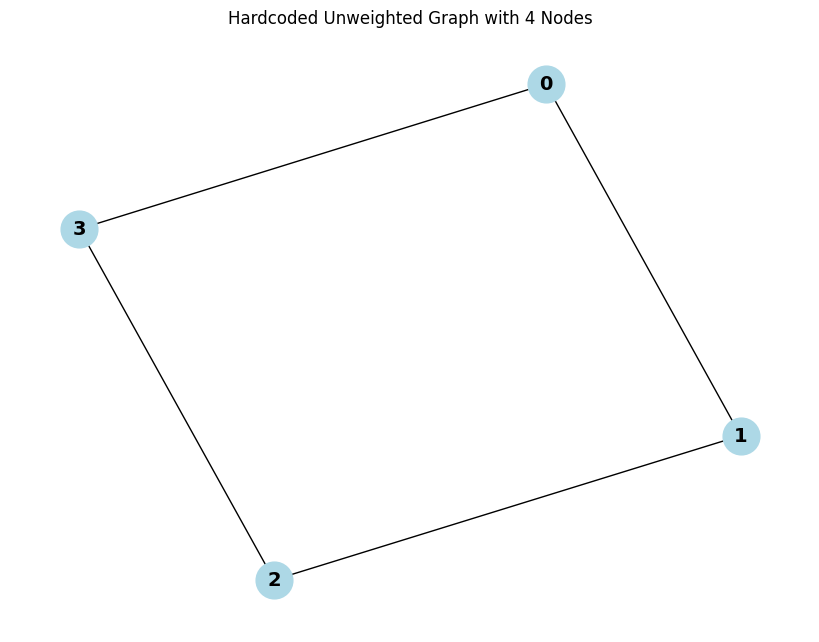

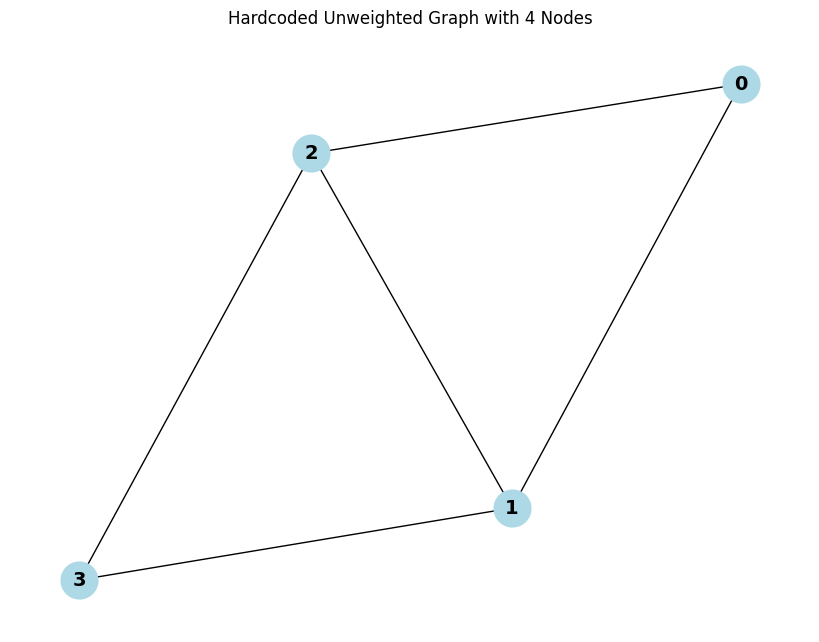

In [21]:
A = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

# Create a graph from the adjacency matrix
# G = nx.from_numpy_array(A)

# Plot the graph without edge weights
# pos = nx.spring_layout(G, seed=42)
# plt.figure(figsize=(8, 6))
# nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=14, font_weight="bold")
# plt.title("Hardcoded Unweighted Graph with 4 Nodes")
# plt.show()


tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
G = qw.getGraph()
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=14, font_weight="bold")
plt.title("Hardcoded Unweighted Graph with 4 Nodes")
plt.show()

qw.setCustomGraph(A)
G = qw.getGraph()
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=14, font_weight="bold")
plt.title("Hardcoded Unweighted Graph with 4 Nodes")
plt.show()

In [22]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph,timeList=tList)
print(qw.getTimeList())
print(type(qw.getTimeList()))

qw.setTimeList([2,4])
print(qw.getTimeList())
print(type(qw.getTimeList()))


[0.1, 0.5, 1]
<class 'list'>
[2.0, 2.6666666666666665, 3.333333333333333, 4.0]
<class 'list'>


In [23]:
A = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])


tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
print(qw.getAdjacencyMatrix())

qw.setAdjacencyMatrix(A)

print()
print(qw.getAdjacencyMatrix())

[[0.+0.j 1.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 1.+0.j 0.+0.j]]

[[0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 1.+0.j 0.+0.j]]


In [24]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
print(qw.getHamiltonian())

qw2 = CQWAK(nx.circular_ladder_graph(4))

qw.setHamiltonian(qw2.getHamiltonian())

print()
print(qw.getHamiltonian())

[[ 0.-0.j -1.-0.j  0.-0.j -1.-0.j]
 [-1.-0.j  0.-0.j -1.-0.j  0.-0.j]
 [ 0.-0.j -1.-0.j  0.-0.j -1.-0.j]
 [-1.-0.j  0.-0.j -1.-0.j  0.-0.j]]

[[ 0.-0.j -1.-0.j  0.-0.j -1.-0.j -1.-0.j  0.-0.j  0.-0.j  0.-0.j]
 [-1.-0.j  0.-0.j -1.-0.j  0.-0.j  0.-0.j -1.-0.j  0.-0.j  0.-0.j]
 [ 0.-0.j -1.-0.j  0.-0.j -1.-0.j  0.-0.j  0.-0.j -1.-0.j  0.-0.j]
 [-1.-0.j  0.-0.j -1.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j -1.-0.j]
 [-1.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j -1.-0.j  0.-0.j -1.-0.j]
 [ 0.-0.j -1.-0.j  0.-0.j  0.-0.j -1.-0.j  0.-0.j -1.-0.j  0.-0.j]
 [ 0.-0.j  0.-0.j -1.-0.j  0.-0.j  0.-0.j -1.-0.j  0.-0.j -1.-0.j]
 [ 0.-0.j  0.-0.j  0.-0.j -1.-0.j -1.-0.j  0.-0.j -1.-0.j  0.-0.j]]


In [25]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
qw.runWalk(0)
print(qw.getOperator())

qw2 = CQWAK(nx.circular_ladder_graph(4))
qw2.runWalk(0)

qw.setOperator(qw2.getOperator())

print()
print(qw.getOperator())

[[ 1.00000000e+00+0.j  1.84889275e-32+0.j  2.77555756e-17+0.j
  -8.32667268e-17+0.j]
 [ 1.84889275e-32+0.j  1.00000000e+00+0.j  8.32667268e-17+0.j
   2.46519033e-32+0.j]
 [ 2.77555756e-17+0.j  8.32667268e-17+0.j  1.00000000e+00+0.j
  -2.77555756e-17+0.j]
 [-8.32667268e-17+0.j  2.46519033e-32+0.j -2.77555756e-17+0.j
   1.00000000e+00+0.j]]

[[ 1.00000000e+00+0.j -2.75999935e-17+0.j  5.53555691e-17+0.j
  -6.11039370e-17+0.j -6.11039370e-17+0.j  1.02737300e-16+0.j
  -4.96072012e-17+0.j  1.02737300e-16+0.j]
 [-2.75999935e-17+0.j  1.00000000e+00+0.j -4.72261492e-17+0.j
  -3.02922097e-17+0.j -3.02922097e-17+0.j  1.41314512e-16+0.j
   1.37222057e-17+0.j  2.53663409e-18+0.j]
 [ 5.53555691e-17+0.j -4.72261492e-17+0.j  1.00000000e+00+0.j
   3.02922097e-17+0.j  1.41314512e-16+0.j -5.80477853e-17+0.j
  -4.14777813e-17+0.j -5.80477853e-17+0.j]
 [-6.11039370e-17+0.j -3.02922097e-17+0.j  3.02922097e-17+0.j
   1.00000000e+00+0.j -3.84216296e-17+0.j  3.84216296e-17+0.j
  -8.28500202e-18+0.j -1.70895216

In [26]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
qw.runWalk(0.1,initStateList = initNodes)
print(qw.getWalk())

qw2 = CQWAK(graph)
qw2.runWalk(0.1, initStateList = [2])

qw.setWalk(qw2.getWalk())

print()
print(qw.getWalk())

[[ 1.10652721e-18+9.93346654e-02j]
 [ 9.90033289e-01-3.87839389e-17j]
 [ 1.12128830e-16+9.93346654e-02j]
 [-9.96671108e-03-1.79672572e-17j]]

[[-9.96671108e-03+2.63308633e-17j]
 [ 1.10469039e-16+9.93346654e-02j]
 [ 9.90033289e-01+5.40864390e-17j]
 [-2.83088392e-17+9.93346654e-02j]]


In [27]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = CQWAK(graph)
qw.runWalk(0.1,initStateList = initNodes)
print(qw.searchNodeAmplitude(0))

print()
print(qw.searchNodeProbability(0))

(1.1065272120113604e-18+0.09933466539753062j)

0.009867375749639367


In [28]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = QWAK(graph)
qw.runWalk(0.1,initStateList = initNodes)
print(qw.getMean())

qw = CQWAK(graph)
qw.runWalk(0.1,initStateList = initNodes)
print(qw.getMean())


1.0001986706594785
1.00019867065948


In [29]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = QWAK(graph)
qw.runMultipleWalks(tList,initStateList = initNodes)
print(qw.getMeanList())

qw = CQWAK(graph)
qw.runMultipleWalks(tList,initStateList = initNodes)
print(qw.getMeanList())


[1.0001986706594785, 1.1056609849950738, 2.002735931331238]
[1.00019867065948, 1.1056609849950754, 2.0027359313312414]


In [30]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = QWAK(graph)
qw.runWalk(0.1,initStateList = initNodes)
print(qw.getStDev())

qw = CQWAK(graph)
qw.runWalk(0.1,initStateList = initNodes)
print(qw.getStDev())


0.1418874671992143
0.1418874671992088


In [31]:
tList = [0.1,0.5,1]
n = 4
graph = nx.cycle_graph(n)
initNodes = [1]

qw = QWAK(graph)
qw.runMultipleWalks(tList,initStateList = initNodes)
print(qw.getStDevList())

qw = CQWAK(graph)
qw.runMultipleWalks(tList,initStateList = initNodes)
print(qw.getStDevList())


[np.float64(0.1418874671992143), np.float64(0.7444423653828456), np.float64(1.1888664432541007)]
[array(0.14188747), array(0.74444237), array(1.18886644)]
